In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from data_analysis import *

In [2]:
data = loadDataRng()
data

,Unnamed: 0,network,name,func,k,bias,numPI,time_PI,ks,time_sym,...,time_cov,ke,tss,correct,timeout,time_sym_std,ks_norm,ke_norm,source,version
0,0,NaN,x,00,1,0.00,1,0.000064,0.0,0.000140,...,0.000040,0.000000,"[[['2', [], []]], []]",True,False,0.000008,0.0,0.000000,rng,new
1,1,NaN,x,10,1,0.50,1,0.000029,0.0,0.000173,...,0.000048,1.000000,"[[['1', [], []]], [['0', [], []]]]",True,False,0.000003,0.0,1.000000,rng,new
2,2,NaN,x,01,1,0.50,1,0.000025,0.0,0.000149,...,0.000050,1.000000,"[[['0', [], []]], [['1', [], []]]]",True,False,0.000003,0.0,1.000000,rng,new
3,3,NaN,x,0000,2,0.00,1,0.000040,0.0,0.000152,...,0.000055,0.000000,"[[['22', [], []]], []]",True,False,0.000010,0.0,0.000000,rng,new
4,4,NaN,x,0100,2,0.25,2,0.000039,0.0,0.000174,...,0.000056,1.250000,"[[['12', [], []], ['20', [], []]], [['01', [],...",True,False,0.000017,0.0,0.625000,rng,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,1938,NaN,x,10000010001010011110011111101001,5,0.50,13,0.000206,NaN,1.589620,...,NaN,3.643229,"[[('02201', [[1, 2, 3]], [[1, 2]]), ('00102', ...",False,False,0.007875,NaN,0.728646,rng,v0.1.2
3882,1939,NaN,x,10100011011011101011000000100111,5,0.50,13,0.000186,NaN,2.116533,...,NaN,3.562500,"[[('11002', [[0, 3], [1, 4]], [[2, 3]]), ('201...",False,False,0.007477,NaN,0.712500,rng,v0.1.2
3883,1940,NaN,x,11100010001001001100110100101111,5,0.50,12,0.000189,NaN,1.047355,...,NaN,3.445312,"[[('00121', [[1, 4]], []), ('02211', [[0, 2], ...",False,False,0.009125,NaN,0.689063,rng,v0.1.2
3884,1941,NaN,x,10010100100100111101111100001001,5,0.50,13,0.000178,NaN,1.594460,...,NaN,3.585938,"[[('02001', [[1, 3], [2, 4]], [[0, 1, 3]]), ('...",False,False,0.006700,NaN,0.717187,rng,v0.1.2


In [4]:
x=data[data["version"]=="new"].merge(data[data["version"]=="v0.1.2"], on="Unnamed: 0")

In [6]:
x[x["correct_y"]==False]

,Unnamed: 0,network_x,name_x,func_x,k_x,bias_x,numPI_x,time_PI_x,ks_x,time_sym_x,...,time_cov_y,ke_y,tss_y,correct_y,timeout_y,time_sym_std_y,ks_norm_y,ke_norm_y,source_y,version_y
192,192,NaN,x,0010100001000000,4,0.1875,9,0.000101,2.543750,0.000983,...,NaN,2.500000,"[[('2211', [[0, 1, 2, 3]], [[0, 1], [2, 3]]), ...",False,False,0.002296,NaN,0.625000,rng,v0.1.2
196,196,NaN,x,0100000000011000,4,0.1875,9,0.000108,1.375000,0.000433,...,NaN,2.500000,"[[('2112', [[2, 3]], []), ('2210', [[0, 3], [1...",False,False,0.002883,NaN,0.625000,rng,v0.1.2
199,199,NaN,x,0001100000000001,4,0.1875,9,0.000099,1.796875,0.000515,...,NaN,2.500000,"[[('1202', [[1, 2, 3]], []), ('0112', [[2, 3]]...",False,False,0.001682,NaN,0.625000,rng,v0.1.2
202,202,NaN,x,1000001001000000,4,0.1875,8,0.000099,2.166667,0.000609,...,NaN,2.375000,"[[('2211', [[0, 1, 2, 3]], [[0, 1], [2, 3]]), ...",False,False,0.000632,NaN,0.593750,rng,v0.1.2
203,203,NaN,x,0000011000010000,4,0.1875,9,0.000113,1.822917,0.000665,...,NaN,2.500000,"[[('2200', [[0, 1, 2, 3]], [[0, 1], [2, 3]]), ...",False,False,0.000655,NaN,0.625000,rng,v0.1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,1938,NaN,x,10000010001010011110011111101001,5,0.5000,13,0.000190,2.281250,0.001589,...,NaN,3.643229,"[[('02201', [[1, 2, 3]], [[1, 2]]), ('00102', ...",False,False,0.007875,NaN,0.728646,rng,v0.1.2
1939,1939,NaN,x,10100011011011101011000000100111,5,0.5000,13,0.000215,1.348958,0.001186,...,NaN,3.562500,"[[('11002', [[0, 3], [1, 4]], [[2, 3]]), ('201...",False,False,0.007477,NaN,0.712500,rng,v0.1.2
1940,1940,NaN,x,11100010001001001100110100101111,5,0.5000,12,0.000188,1.135417,0.000712,...,NaN,3.445312,"[[('00121', [[1, 4]], []), ('02211', [[0, 2], ...",False,False,0.009125,NaN,0.689063,rng,v0.1.2
1941,1941,NaN,x,10010100100100111101111100001001,5,0.5000,13,0.000392,1.218750,0.000778,...,NaN,3.585938,"[[('02001', [[1, 3], [2, 4]], [[0, 1, 3]]), ('...",False,False,0.006700,NaN,0.717187,rng,v0.1.2


<AxesSubplot: xlabel='time_sym', ylabel='Count'>

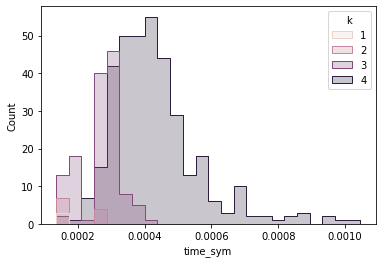

In [5]:
sns.histplot(data, x="time_sym", hue="k", element="step")

In [ ]:
A = data[(data["timeout"]==True)&(data["version"]=="new")]
B = data[(data["timeout"]==False)&(data["version"]=="v0.1.2")]
A.merge(B, on="Unnamed: 0").sort_values("correct_y").drop_duplicates(subset="func_x")

In [ ]:
plt.hist(data["time_sym"]/data["time_sym_std"], bins=60)
plt.xscale("log")
# [x for x in list(data["time_sym"]/data["time_sym_std"]) if x < 2]